In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
df = pd.DataFrame(iris.data , columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df1 = pd.DataFrame(df[['petal length (cm)' , 'petal width (cm)']])
df1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Width')

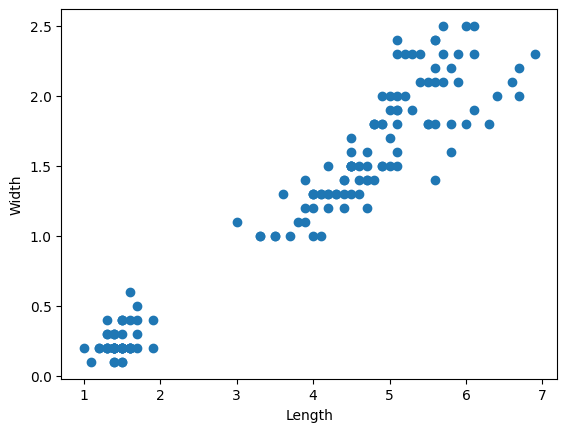

In [20]:
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'])
plt.xlabel('Length')
plt.ylabel('Width')

In [21]:
scaler = MinMaxScaler()

scaler.fit(df1[['petal length (cm)']])
df1['petal length (cm)'] = scaler.transform(df1[['petal length (cm)']])

scaler.fit(df1[['petal width (cm)']])
df1['petal width (cm)'] = scaler.transform(df1[['petal width (cm)']])

df1

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


Text(0, 0.5, 'Width')

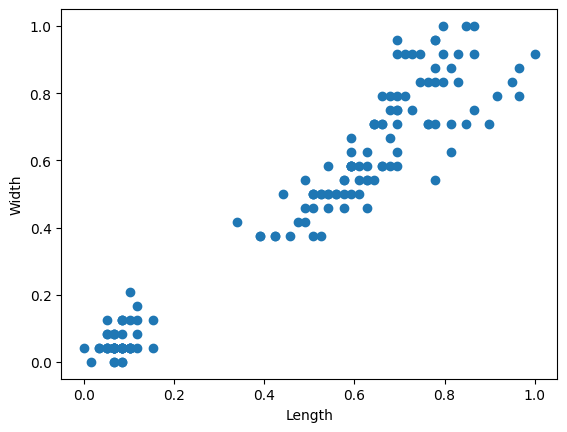

In [23]:
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'])
plt.xlabel('Length')
plt.ylabel('Width')

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df1[['petal length (cm)' , 'petal width (cm)']])
df1['cluster']=y_predicted
df1

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [31]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [32]:
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['petal length (cm)' , 'petal width (cm)']])
    sse.append(km.inertia_)

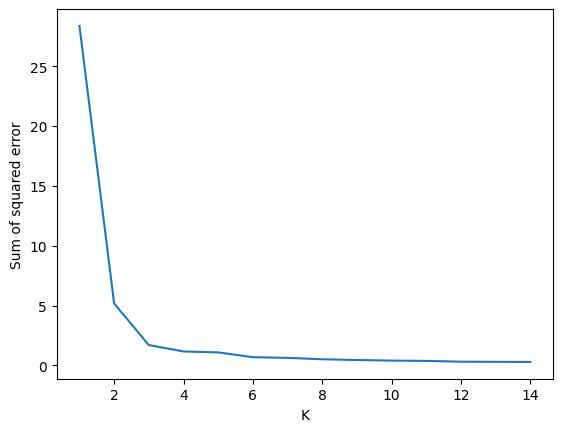

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

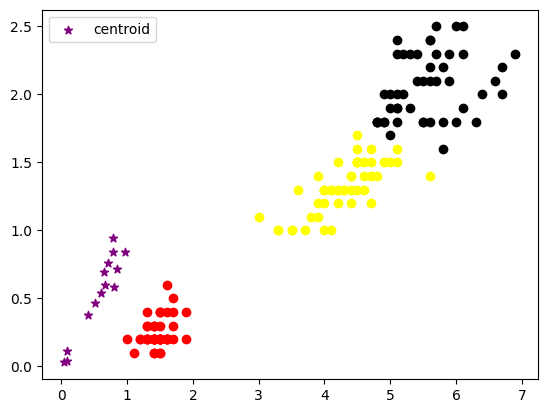

In [36]:
df2 = df[df1.cluster==0]
df3 = df[df1.cluster==1]
df4 = df[df1.cluster==2]
plt.scatter(df2['petal length (cm)'] , df2['petal width (cm)'],color='yellow')
plt.scatter(df3['petal length (cm)'] , df3['petal width (cm)'],color='red')
plt.scatter(df4['petal length (cm)'] , df4['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()